In [ ]:
# Import all libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import matplotlib.pylab as plt
import math
from scipy import ndimage
from sklearn.externals import joblib

%matplotlib inline

/home/abhijeet/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#  Read the value

We will store the data in a variable **digit**

In [2]:
digit=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [40]:
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
digit.values[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254,
       217, 246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 25

In [42]:
digit.values[1].shape

(785,)

In [43]:
a=zip(*[iter(digit.values[0])]*28)
a=[]
b=[]
j=0
for i in digit.values[0]:
    if j==28:
        a.append(b)
        b=[]
        j=0
    b.append(i)
    j+=1
len(a[27])

28

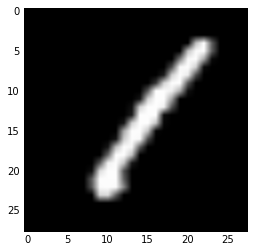

In [44]:
cv2.imwrite('bw_image.jpg', np.array(a))
plt.imshow(a, cmap='gray')

In [45]:
digit.isnull().any().any()

False

In [46]:
y=digit.label.values
del digit['label']
print y

[1 0 1 ..., 7 6 9]


Since, there are many features.We have to reduce no of features.Otherwise, there will be curse of dimensionality.

In [47]:
# x=np.concatenate((digit.values,test.values),axis=0)
x=digit.values

In [48]:
# test=x[42000:]
# test

In [49]:
print len(test)

28000


In [50]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
pca = PCA(n_components=80)
X = pca.fit(x)

In [52]:
print pca.explained_variance_ratio_.sum()

0.891128152867


In [53]:
pca.explained_variance_ratio_*100

array([ 9.74893769,  7.16026628,  6.14590336,  5.379302  ,  4.89426213,
        4.30321399,  3.27705076,  2.89210317,  2.76690235,  2.34887103,
        2.09932543,  2.05900116,  1.7025535 ,  1.69278702,  1.58112641,
        1.48323962,  1.31968789,  1.28272708,  1.18797614,  1.15275473,
        1.07219122,  1.0151993 ,  0.96490226,  0.91284607,  0.88764086,
        0.83876631,  0.81185585,  0.77740575,  0.74063512,  0.68666149,
        0.65798221,  0.63879861,  0.59936702,  0.58891341,  0.56433518,
        0.54096705,  0.50922194,  0.48750494,  0.47556942,  0.46654472,
        0.45295246,  0.44498916,  0.41825528,  0.39750576,  0.38454199,
        0.37491948,  0.36101322,  0.34852217,  0.3364878 ,  0.32073813,
        0.31546712,  0.30914554,  0.29370918,  0.28654134,  0.28075944,
        0.26961844,  0.26583138,  0.2562986 ,  0.25382109,  0.24617825,
        0.23971619,  0.23873958,  0.22759145,  0.22151844,  0.21393361,
        0.2061334 ,  0.20285115,  0.19597671,  0.19363861,  0.18

In [54]:
X = pca.transform(x)
X

array([[  661.59577975,   699.31132821,  -183.28203965, ...,
          -17.30071895,    36.47190809,    55.0678419 ],
       [-1701.4516848 ,   360.5515562 ,   501.80559391, ...,
         -121.75599908,    91.05534419,   -27.71353453],
       [  886.89443411,   293.76578219,   -67.15530988, ...,
          -10.01873821,   -10.38738811,     7.03179103],
       ..., 
       [ -336.26998171,  -950.01528029,   168.60541437, ...,
          -13.86335955,    79.17897081,    20.86558549],
       [ -327.39939154,   -62.01608944,  -697.53640055, ...,
         -110.33200832,   -14.822817  ,   -25.77706408],
       [  364.24919987,  -418.89302645,   -62.89982318, ...,
          -24.32642132,   -12.81530656,    -8.38418219]])

In [55]:
# print len(X[0])
# print (len(X))

In [56]:
df=pd.DataFrame()
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc71,pc72,pc73,pc74,pc75,pc76,pc77,pc78,pc79,pc80
0,661.595780,699.311328,-183.282040,120.611394,-81.081811,489.461886,-683.470838,85.559387,-348.548052,202.978545,...,-88.899954,-13.693812,-15.052983,-53.991925,105.550832,-50.308849,-7.743945,-17.300719,36.471908,55.067842
1,-1701.451685,360.551556,501.805594,335.423656,-442.378933,738.404049,653.875438,-176.600677,7.520175,67.846273,...,-54.970453,-49.868296,-96.765693,4.574489,-74.626924,26.150748,-120.750221,-121.755999,91.055344,-27.713535
2,886.894434,293.765782,-67.155310,78.263763,-473.715921,-323.540638,437.799098,-305.377740,195.295503,-25.626023,...,38.814173,-53.835133,61.029015,-23.261542,-23.659675,80.244728,-3.926830,-10.018738,-10.387388,7.031791
3,165.755602,-300.182761,64.145485,759.706261,-425.844379,157.390337,-304.099140,276.408982,45.867215,-295.477581,...,-47.843656,88.726792,-5.750325,53.517881,29.385850,40.044010,41.919544,8.979341,48.234307,95.392258
4,-1923.709716,449.153069,548.613023,188.555147,-651.736273,990.063824,564.507042,-255.915217,-124.914693,177.566843,...,70.021285,-83.657608,-234.220513,-8.112911,-90.048950,-35.521451,-1.103267,-32.704531,10.797084,-73.454912


In [57]:
test=df[42000:]

In [58]:
df=df[:42000]
len(df)

42000

In [59]:
df['digit']=y

In [60]:
y=df['digit'].values
y

array([1, 0, 1, ..., 7, 6, 9])

In [61]:
del df['digit']

Now we have to make the model 

Split data for cross validation 

In [62]:
Xtrain, Xcv, ytrain, ycv = train_test_split(df.values, y, train_size=0.80)

In [63]:
print (Xtrain)

[[-1268.9579126    202.56834156 -1065.92046662 ...,   -30.45330614
    -35.50008062   -46.03326307]
 [  356.72255566  -776.50033223   -95.56368944 ...,    44.23397172
   -154.74872263     3.35744922]
 [   34.76417463   796.6691344    772.58576213 ...,    48.55769397
     40.01168188   -70.93867183]
 ..., 
 [  -97.57744056   127.46067565  1039.17250129 ...,    26.49562748
    -62.56851532    -6.08601675]
 [  881.02254827   483.85883208   -39.90369064 ...,   -65.70117697
     20.53141193    81.6163062 ]
 [  262.37469145  -340.7056622    293.69809956 ...,   -54.1253388
     53.86823432   -23.60773259]]


In [64]:
clf= KNeighborsClassifier(10)
print clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [65]:
clf=clf.fit(Xtrain, ytrain)
joblib.dump(clf, 'digitrecogniser.pkl')

['digitrecogniser.pkl',
 'digitrecogniser.pkl_01.npy',
 'digitrecogniser.pkl_02.npy',
 'digitrecogniser.pkl_03.npy',
 'digitrecogniser.pkl_04.npy',
 'digitrecogniser.pkl_05.npy',
 'digitrecogniser.pkl_06.npy',
 'digitrecogniser.pkl_07.npy',
 'digitrecogniser.pkl_08.npy',
 'digitrecogniser.pkl_09.npy']

In [66]:
joblib.dump(pca, 'digitPca.pkl')

['digitPca.pkl',
 'digitPca.pkl_01.npy',
 'digitPca.pkl_02.npy',
 'digitPca.pkl_03.npy',
 'digitPca.pkl_04.npy']

In [67]:
training_accuracy = clf.score(Xtrain, ytrain)

KeyboardInterrupt: 

In [ ]:
test_accuracy = clf.score(Xcv, ycv)
print (training_accuracy,test_accuracy)

In [ ]:
Xall=np.concatenate((Xtrain, Xcv))
Yall=np.concatenate((ytrain,ycv))

In [ ]:
predict=clf.predict(Xall)

In [ ]:
Yall

In [ ]:
predict

In [ ]:
accuracy_score(Yall, predict)

In [ ]:
test=pd.read_csv("test.csv")

In [ ]:
X = pca.transform(test.values)

In [ ]:
X

In [ ]:
predict=clf.predict(X)

In [ ]:
test.index.values

In [ ]:
result = {}
result["ImageId"]=test.index.values
result["Label"]=predict
print result

In [ ]:
from pandas import Series, DataFrame
result = DataFrame(result,columns=['ImageId','Label'])
print result

In [ ]:
result.to_csv('model_output.csv')

In [24]:
clf = joblib.load('digitrecogniser.pkl') 

In [25]:
pca = joblib.load('digitPca.pkl') 

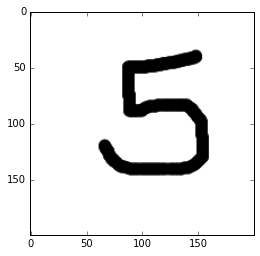

In [72]:
image = cv2.imread('test.png',0)
plt.imshow(image, cmap='gray')

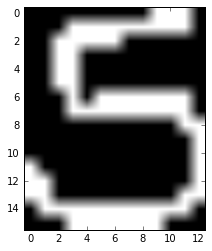

In [73]:
image = cv2.imread('test.png',0)

# resize the images and invert it (black background)
image = cv2.resize(255-image, (28, 28))
(thresh, im_bw) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
while np.sum(im_bw[0]) == 0:
      im_bw = im_bw[1:]

while np.sum(im_bw[:,0]) == 0:
      im_bw = np.delete(im_bw,0,1)

while np.sum(im_bw[-1]) == 0:
      im_bw = im_bw[:-1]

while np.sum(im_bw[:,-1]) == 0:
      im_bw = np.delete(im_bw,-1,1)
plt.imshow(im_bw, cmap='gray')

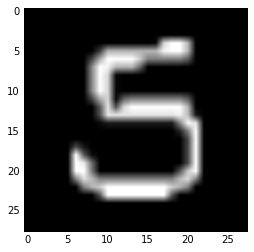

In [74]:
rows,cols = im_bw.shape
if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    im_bw = cv2.resize(im_bw, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    im_bw = cv2.resize(im_bw, (cols, rows))
colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
im_bw = np.lib.pad(im_bw,(rowsPadding,colsPadding),'constant')
plt.imshow(im_bw, cmap='gray')

In [30]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

In [31]:
def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted  

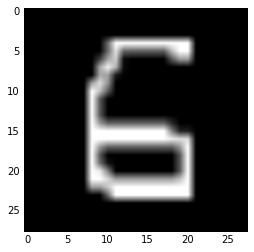

In [32]:
shiftx,shifty = getBestShift(im_bw)
plt.imshow(im_bw, cmap='gray')
shifted = shift(im_bw,shiftx,shifty)
plt.imshow(im_bw, cmap='gray')
im_bw = shifted

In [33]:
im_bw.shape

(28, 28)

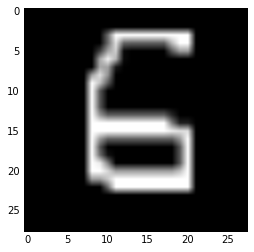

In [34]:
cv2.imwrite('bw_image.jpg', np.array(im_bw))
plt.imshow(im_bw, cmap='gray')

In [35]:
im_bw = [val for sublist in im_bw for val in sublist]

In [36]:
im_bw = np.array(im_bw)
im_bw.shape

(784,)

In [37]:
X = pca.transform(im_bw)

NameError: name 'pca' is not defined

In [12]:
X

NameError: name 'X' is not defined

In [13]:
predict=clf.predict(X)

NameError: name 'clf' is not defined

In [14]:
predict

NameError: name 'predict' is not defined

In [70]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import cv2
import math
from scipy import ndimage
from sklearn.externals import joblib


def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted  

def predictDigit(img):
    clf = joblib.load('digitRecognizer/static/mlModel/digitrecogniser.pkl') 
    pca = joblib.load('digitRecognizer/static/pca/digitPca.pkl') 
    image = cv2.imread(img,0)

    # resize the images and invert it (black background)
    image = cv2.resize(255-image, (28, 28))
    (thresh, im_bw) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    while np.sum(im_bw[0]) == 0:
        im_bw = im_bw[1:]

    while np.sum(im_bw[:,0]) == 0:
        im_bw = np.delete(im_bw,0,1)

    while np.sum(im_bw[-1]) == 0:
        im_bw = im_bw[:-1]

    while np.sum(im_bw[:,-1]) == 0:
        im_bw = np.delete(im_bw,-1,1)

    rows,cols = im_bw.shape
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        im_bw = cv2.resize(im_bw, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        im_bw = cv2.resize(im_bw, (cols, rows))
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    im_bw = np.lib.pad(im_bw,(rowsPadding,colsPadding),'constant')
    shiftx,shifty = getBestShift(im_bw)
    shifted = shift(im_bw,shiftx,shifty)
    im_bw = shifted
    im_bw = [val for sublist in im_bw for val in sublist]
    im_bw = np.array(im_bw)
    X = pca.transform(im_bw)
    predict=clf.predict(X)
    return predict

In [71]:
predictDigit("test.png")

/home/abhijeet/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([5])